In [66]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("tweets.csv")
data.shape
data

[nltk_data] Downloading package punkt to C:\Users\NIAR
[nltk_data]     Tech\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\NIAR
[nltk_data]     Tech\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\NIAR
[nltk_data]     Tech\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


id  keyword                 location  \
0          0   ablaze                      NaN   
1          1   ablaze                      NaN   
2          2   ablaze            New York City   
3          3   ablaze           Morgantown, WV   
4          4   ablaze                      NaN   
...      ...      ...                      ...   
11365  11365  wrecked  Blue State in a red sea   
11366  11366  wrecked               arohaonces   
11367  11367  wrecked                       ðŸ‡µðŸ‡­   
11368  11368  wrecked           auroraborealis   
11369  11369  wrecked                      NaN   

                                                    text  target  
0      Communal violence in Bhainsa, Telangana. "Ston...       1  
1      Telangana: Section 144 has been imposed in Bha...       1  
2      Arsonist sets cars ablaze at dealership https:...       1  
3      Arsonist sets cars ablaze at dealership https:...       1  
4      "Lord Jesus, your love brings freedom and pard...       0  
...                                                  ...     ...  
11365  Media should have warned us well in advance. T...       0  
11366  i feel directly attacked ðŸ’€ i consider moonbin ...       0  
11367  i feel directly attacked ðŸ’€ i consider moonbin ...       0  
11368  ok who remember "outcast" nd the "dora" au?? T...       0  
11369     Jake Corway wrecked while running 14th at IRP.       1  

[11370 rows x 5 columns]

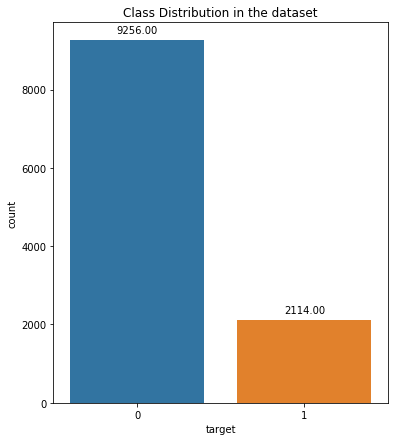

In [27]:

plt.figure(figsize=(6, 7))
plt.title("Class Distribution in the dataset")
plot= sns.countplot(data["target"], 
                   order = data["target"].value_counts().index)

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [65]:
# checking for missing values in target and text
print(data.isnull().sum())
print('No missing values in target and text column')

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64
No missing values in target and text column


In [68]:
import re
from nltk. stem import PorterStemmer

# function that is used to process the data
def cleaned(text):
    # removes new line
    text = re.sub(r"\n","",text)
    # converting text to lowercase
    text = text.lower()
    #Removes punctuation
    text = re.sub(r'[^\w\s]','',text) 
    #Removes digits
    text = re.sub(r"\d","",text)        
    # removes non-ascii
    text = re.sub(r'[^\x00-\x7f]',r' ',text) 
    #Removes http
    text = re.sub(r'http\S+|www.\S+', '', text) 
    # Remove atastope
    text = re.sub("'", "", text)
    #Remove single character
    text = re.sub(r"\b[a-zA-Z]\b", "", text)   
    return text

print(data['text'].apply(lambda x : cleaned(x)))


0        communal violence in bhainsa telangana stones ...
1        telangana section  has been imposed in bhainsa...
2                 arsonist sets cars ablaze at dealership 
3                arsonist sets cars ablaze at dealership  
4        lord jesus your love brings freedom and pardon...
                               ...                        
11365    media should have warned us well in advance th...
11366     feel directly attacked   consider moonbin amp...
11367     feel directly attacked   consider moonbin amp...
11368    ok who remember outcast nd the dora au those a...
11369          jake corway wrecked while running th at irp
Name: text, Length: 11370, dtype: object


In [35]:
#Splitting the dataset into training set and testing set

from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_text=data['text'].apply(lambda x : cleaned(x))
X = train_text.to_numpy()
y = data['target'].to_numpy()
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    #X_train = X.loc[train_index]
    X_train, X_test = X[train_index], X[test_index]

    y_train, y_test = y[train_index], y[test_index]

TRAIN: [11300   922  3473 ... 10851  8646  1966] TEST: [ 5917 10117  5597 ...  4092   644  2878]


In [36]:
#Tfid for vectorizing
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
tweets_pipeline = Pipeline([('CVec', CountVectorizer(stop_words='english')),
                     ('Tfidf', TfidfTransformer())])

X_train_tranformed = tweets_pipeline.fit_transform(X_train)
X_test_tranformed = tweets_pipeline.transform(X_test)
print(X_train_tranformed)

  (0, 16639)	0.3309713767961625
  (0, 14551)	0.28633502965970836
  (0, 13628)	0.3165245247001326
  (0, 13092)	0.25688020644821985
  (0, 12775)	0.3309713767961625
  (0, 10004)	0.30627432001351496
  (0, 9584)	0.29832364357415225
  (0, 3213)	0.29832364357415225
  (0, 2445)	0.30627432001351496
  (0, 1684)	0.28633502965970836
  (0, 1319)	0.29182746791748504
  (1, 16811)	0.2615941150166046
  (1, 15968)	0.3287936627501556
  (1, 15125)	0.3226054896316673
  (1, 13923)	0.3044611506262364
  (1, 10867)	0.37289598549044606
  (1, 10043)	0.37289598549044606
  (1, 6532)	0.37289598549044606
  (1, 6415)	0.356619130368616
  (1, 3824)	0.28698588817803516
  (2, 16417)	0.3786996439133274
  (2, 15475)	0.21387071070387487
  (2, 13460)	0.26319392753251747
  (2, 12452)	0.34134389108226887
  (2, 9116)	0.3056523876911783
  :	:
  (7956, 17434)	0.3140374326504661
  (7956, 16771)	0.26000716865617507
  (7956, 9575)	0.2867932978444509
  (7956, 9142)	0.36622245771536127
  (7956, 7476)	0.1954298045530922
  (7956, 6631)	

In [42]:
#Using Random forest classifer to train and predict the data.
from time import process_time 
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import roc_auc_score,roc_curve
df_results = pd.DataFrame(data=np.zeros(shape=(1,3)), columns = ['Classifier', 'Area Under Curve', 'Training time'])
count = 0
t_start = process_time()
clf =  RandomForestClassifier() 

clf.fit(X_train_tranformed, y_train)
t_stop = process_time()
t_elapsed = t_stop - t_start
y_predicted = clf.predict(X_test_tranformed)
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
print(roc_auc_score(y_test, y_predicted))
df_results.loc[count,'Classifier'] = 'Random Forest Classifier'
df_results.loc[count,'Area Under Curve'] = roc_auc_score(y_test, y_predicted)
df_results.loc[count,'Training time'] = t_elapsed


0.7345335558309639


In [67]:
print(df_results)

                 Classifier  Area Under Curve  Training time
0  Random Forest Classifier          0.734534       9.859375


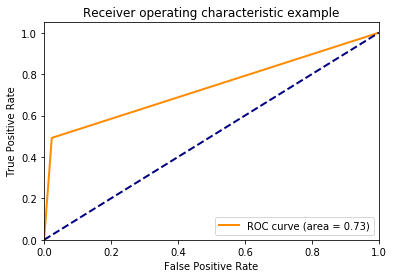

In [44]:
plt.figure()
lw = 2
plt.plot(false_positive_rate1,true_positive_rate1, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()